In [1]:
!pip install qiskit

In [2]:
!pip install qiskit-aer

In [3]:
!pip install -U qiskit qiskit-aer qiskit-optimization qiskit-algorithms


In [4]:
!pip install -U qiskit qiskit-aer qiskit-optimization qiskit-algorithms
!pip install -U qiskit qiskit-aer qiskit-optimization qiskit-algorithms


In [5]:
# Core imports
from qiskit_aer.primitives import Sampler

# Optimization imports
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# Algorithm and optimizer imports
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA

# Optional: visualization (for showing the graph)
import networkx as nx
import matplotlib.pyplot as plt


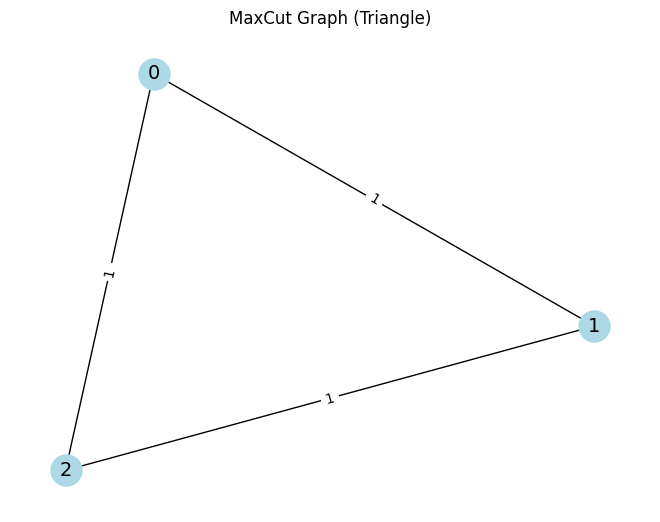

In [6]:
# Create a simple weighted graph (triangle) represented as an adjacency matrix
w = [
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# Create a NetworkX graph from the adjacency matrix
import networkx as nx
G = nx.Graph()
n = len(w)
for i in range(n):
    for j in range(i + 1, n):
        if w[i][j] != 0:
            G.add_edge(i, j, weight=w[i][j])

# Create a MaxCut instance from the NetworkX graph
maxcut = Maxcut(G)

# Convert to a quadratic program
qp = maxcut.to_quadratic_program()

# Visualize the graph
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, seed=42) # for consistent layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("MaxCut Graph (Triangle)")
plt.show()

In [7]:
# Use the Aer Sampler
sampler = Sampler()

# Classical optimizer
optimizer = COBYLA(maxiter=100)

# Define QAOA circuit
qaoa = QAOA(sampler=sampler, optimizer=optimizer, reps=1)
